In [8]:
import os
import torch
import matplotlib.pyplot as plt

In [ ]:
BASE_DIR = 'D:/Desktop/mobility-seoul/'  # Change this to your base directory!
MODEL_ROOT = os.path.join(BASE_DIR, 'Results/models')
MODEL_NAMES = ["gnn_baseline", "gnn_climate", "gnn_urban", "gnn_climate_urban"]

LOSS_KEY = "mse"
LOCK_Y_SCALE = True

loss_plot_config = {
    "mse":    {"label": "Node MSE", "color": "green",     "linestyle": "-", "linewidth": 1},
    "presence":{"label": "Node Presence BCE","color":"dodgerblue","linestyle":"-","linewidth":1},
    "edge":   {"label": "Edge Count MSE",    "color": "deeppink",  "linestyle": "-", "linewidth": 1},
    "mode":   {"label": "Edge Transport CE", "color": "orange",    "linestyle": "-", "linewidth": 1},
    "total":  {"label": "Total Loss",        "color": "black",     "linestyle": ":", "linewidth": 1.6},
}

MODEL_PLOT_ORDER = [
    "gnn_climate_urban",  
    "gnn_urban",         
    "gnn_climate",        
    "gnn_baseline",       
]

MODEL_LABELS = {
    "gnn_climate_urban": "Urban+Climate",
    "gnn_urban":         "Urban-only",
    "gnn_climate":       "Climate-only",
    "gnn_baseline":      "Baseline",
}

MODEL_COLORS = {
    "gnn_climate_urban": "#018571",  
    "gnn_urban":         "#80cdc1", 
    "gnn_climate":       "#a6611a",  
    "gnn_baseline":      "#dfc27d",  
}


In [10]:
def plot_curves(ax, curves_dict, title, lock_ylim=False, ylim=None):
    for name in MODEL_PLOT_ORDER:
        if name not in curves_dict:
            continue
        y = curves_dict[name]
        x = range(1, len(y) + 1)
        ax.plot(
            x, y,
            label=MODEL_LABELS[name],
            color=MODEL_COLORS[name],
            linewidth=1
        )
    # your house style
    ax.set_xlabel("epoch", color="gray", fontsize=10)
    ax.set_title(title, color="gray", fontsize=10)
    ax.grid(axis="y", color="lightgray")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.tick_params(labelsize=9, colors="gray")
    ax.spines["bottom"].set_color("lightgray")
    if lock_ylim and ylim is not None:
        ax.set_ylim(*ylim)
    ax.legend(frameon=False)

In [ ]:
def load_loss_curves(model_root, model_names, loss_key):
    train_curves, val_curves = {}, {}
    for name in model_names:
        ckpt_path = os.path.join(model_root, f"{name}.pth")
        ckpt = torch.load(ckpt_path, map_location="cpu")

        if "train_losses" not in ckpt or "val_losses" not in ckpt:
            raise ValueError(f"{ckpt_path} missing 'train_losses' or 'val_losses'")

        train = ckpt["train_losses"][loss_key]
        val   = ckpt["val_losses"][loss_key]
        train_curves[name] = list(train)
        val_curves[name]   = list(val)
    return train_curves, val_curves

def style_axis(ax, title):
    ax.set_xlabel("epoch", color="gray", fontsize=10)
    ax.set_title(title, color="gray", fontsize=10)
    ax.grid(axis="y", color="lightgray")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.tick_params(labelsize=9, colors="gray")
    ax.spines["bottom"].set_color("lightgray")

In [ ]:
train_curves, val_curves = load_loss_curves(MODEL_ROOT, MODEL_NAMES, LOSS_KEY)

if LOCK_Y_SCALE:
    all_vals = []
    for d in (train_curves, val_curves):
        for v in d.values():
            all_vals.extend(v)
    shared_ylim = (min(all_vals), max(all_vals))
else:
    shared_ylim = None

C:\Users\Michele\AppData\Local\Temp\ipykernel_15488\3816097787.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location="cpu")


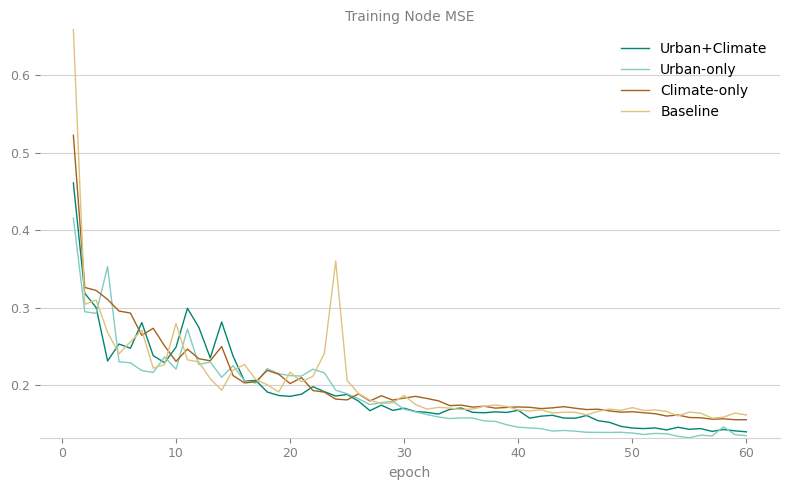

In [ ]:
# -------- training loss plot --------
fig_train, ax_tr = plt.subplots(1, 1, figsize=(8, 5))
plot_curves(ax_tr, train_curves, f"Training {loss_plot_config[LOSS_KEY]['label']}",
            lock_ylim=LOCK_Y_SCALE, ylim=shared_ylim)
plt.tight_layout(); plt.show()

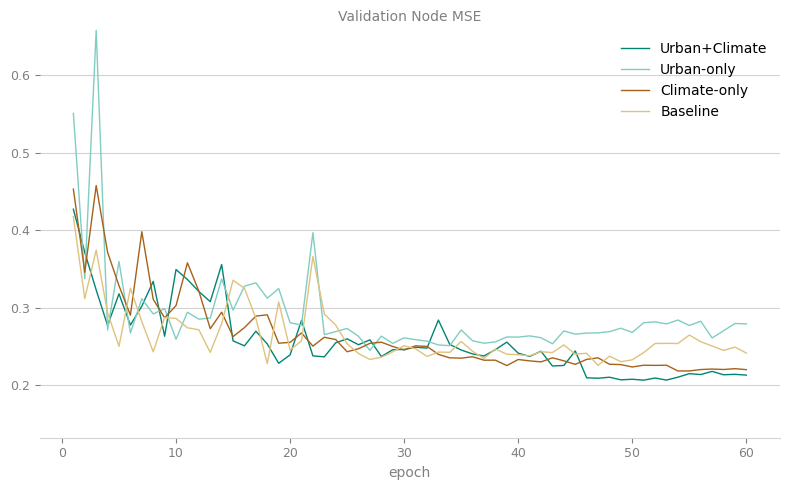

In [ ]:
# -------- validation loss plot --------
fig_val, ax_val = plt.subplots(1, 1, figsize=(8, 5))
plot_curves(ax_val, val_curves, f"Validation {loss_plot_config[LOSS_KEY]['label']}",
            lock_ylim=LOCK_Y_SCALE, ylim=shared_ylim)
plt.tight_layout(); plt.show()